#**Archisha Sinha**
##Topic: Gaussian mixture models
##Domain: Intelligent Systems

##GAUSSIAN MIXTURE MODEL

The Gaussian Mixture Model (GMM) is a probabilistic model used for clustering and density estimation. It assumes that the data points are generated from a mixture of several Gaussian distributions, each representing a cluster. GMM estimates the parameters of these Gaussians to identify the underlying clusters and their corresponding probabilities, allowing it to handle complex data distributions and overlapping clusters.


Gaussian Mixture Models (GMMs) are used for various tasks:
1. Clustering: GMM identifies underlying clusters in data, accommodating non-spherical clusters and overlapping patterns.
2. Density Estimation: GMM estimates the underlying probability density function of data.
3. Anomaly Detection: It can detect anomalies as data points with low probability under the fitted GMM.
4. Feature Extraction: GMM can represent data points in reduced-dimensional latent space for feature extraction and dimensionality reduction.


Gaussian mixture models (GMMs) are useful for clustering multimodal data with an unknown number of clusters. They are best suited for continuous data but can also be used with discrete data. Consider using a GMM if your data has multiple peaks in its value distribution or if you’re unsure of the number of clusters present.


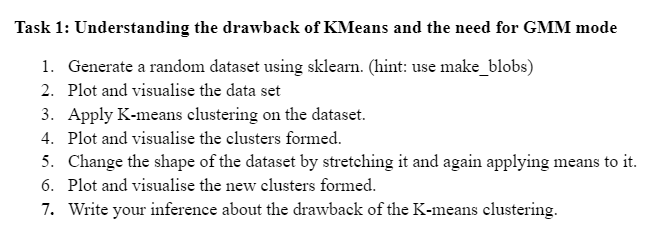

In [ ]:
#Importing necessary libraries
from sklearn.datasets import make_blobs   #make_blobs is used to generate random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Generate a random dataset with make_blobs
# n_samples: total number of points equally divided among clusters
# centers: number of centers to generate, or the fixed center locations
# random_state: 0 for multiple runs of the program it takes the same datapoints
# cluster_std: standard deviation of clusters (lesser is the std more closer is the points to each other)
# n_features: number of features for each sample#
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

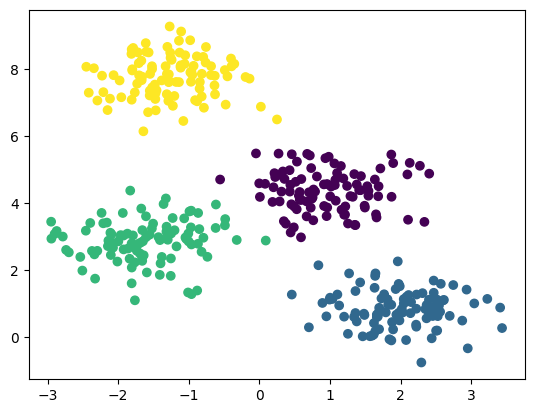

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [ ]:
#Plot the data with K means Labels
from sklearn.cluster import KMeans

In [ ]:
kmeans= KMeans(4, random_state=0)
labels= kmeans.fit(X).predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


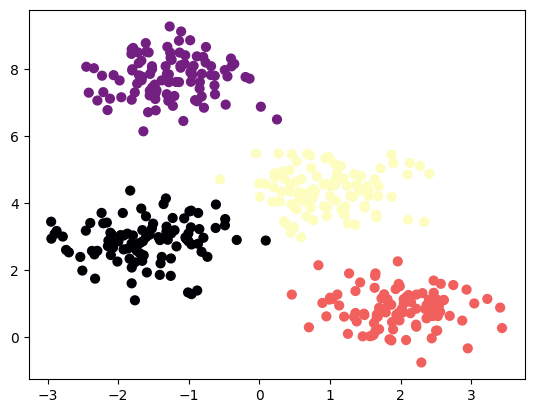

In [ ]:
plt.scatter(X[:,0], X[:,1], c=labels ,s= 40,  cmap='magma')

K means give proper assignment of the points
Boundary will ne a circular in K means
So it makes a HArd boundary
Any point not part of the circle will not be in that cluster
It eithers a point to a cluster or not
So it takes a Hard decision.

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # Plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='magma', zorder=2)

    # Plot the representation of the Kmeans model
    centers = kmeans.cluster_centers_

    for i, center in enumerate(centers):
        radii = cdist(X[labels == i], [center]).max(axis=0)
        ax.add_patch(plt.Circle(center, np.max(radii), fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

    plt.show()

# Example usage:
# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


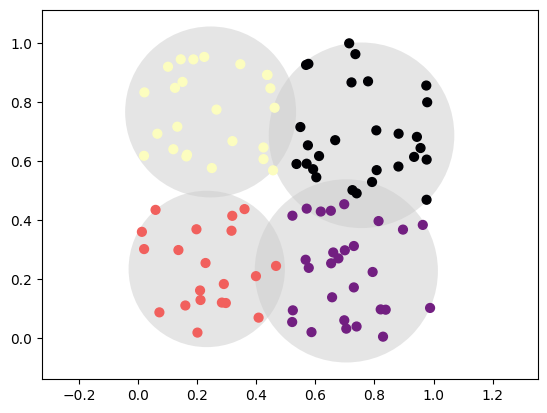

In [ ]:
# Create a KMeans model
kmeans = KMeans(n_clusters=4, random_state=0)

# Call the plot_kmeans function
plot_kmeans(kmeans, X)

k considers the circular boundary which is the hard decision it makes
not always we'll have the same type of data points

drawbacks:

datapoints can overlap still it will take the circular decision boundary
this data set is ideal for Kmeans clustering

now we will multiply a random value to each data points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


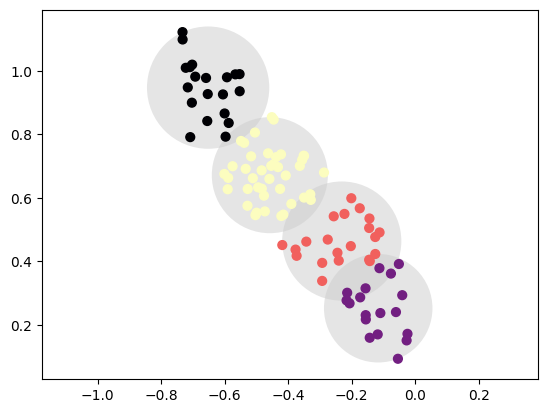

In [ ]:
rng= np.random.RandomState(13)
X_streched= np.dot(X, rng.randn(2,2))   #dot product of X and rng.randn(2,2)
kmeans= KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_streched)

It is used to find the cluster in the same manner as Kmeans but using EM,
Expectation Maximization Algorithm

It maximises the prob that a point belongs to a particular cluster

it is a probablistic model that assigns probability to the point to which cluster it belongs

GMM attemps to find the mixture of multidimensional points

TASK 2:

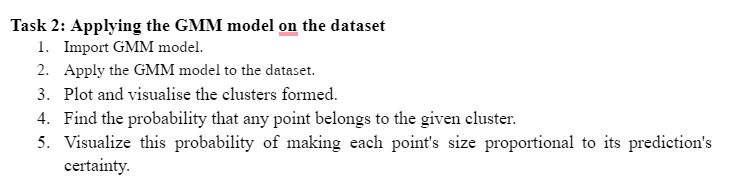

In [ ]:
from sklearn import mixture

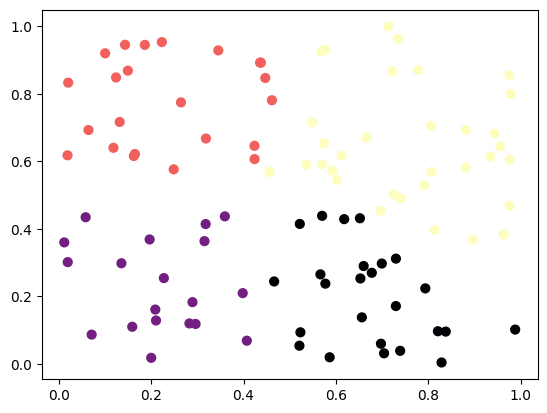

In [ ]:
gmm= mixture.GaussianMixture(n_components=4)
gmm_model= gmm.fit(X)
labels= gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='magma')

Gaussian gives the prob for the datapoints

In [ ]:
probs=gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.018 0.    0.147 0.835]
 [0.216 0.    0.018 0.765]
 [0.029 0.    0.561 0.409]
 [0.    0.    0.669 0.33 ]
 [0.202 0.    0.    0.798]]


We can visualize

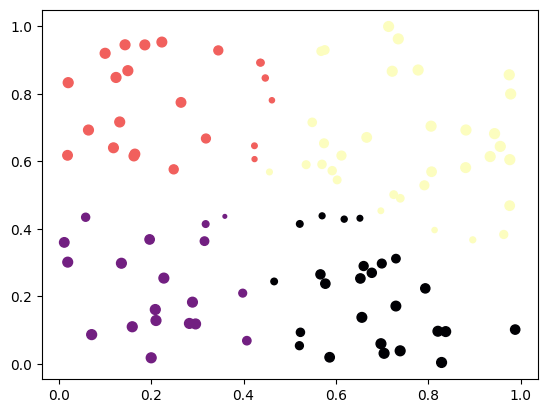

In [ ]:
size=50*probs.max(1)**2 # square emphasizes difference
plt.scatter(X[:, 0], X[:, 1], c=labels, s=size, cmap='magma')

the size of the marker is propotional to the probability

this probability signifies how much is the point near to cluster


===============================================================

WHAT AN EXPECTATION MAXIMIZATION IS?

EM chooses starting location and then repeat the steps:

E-steps: for each point find the prob that a point belongs to a particular cluster

M-step: Each cluster will have certain points, for each cluster updates its cluster center depending on the weights.

Repeat till none of the points move away from their clusters.

IN GMM IT DOES A SOFT ASSIGNMENT AS COMPARED TO THE K MEANS HARD ASSIGNMENT

TASK 3: Apply gmm model to X_streched and find the differences. Make one or two changes and submit it.

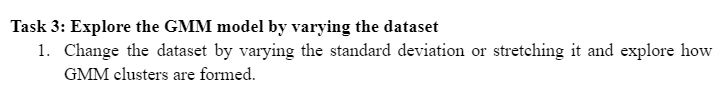

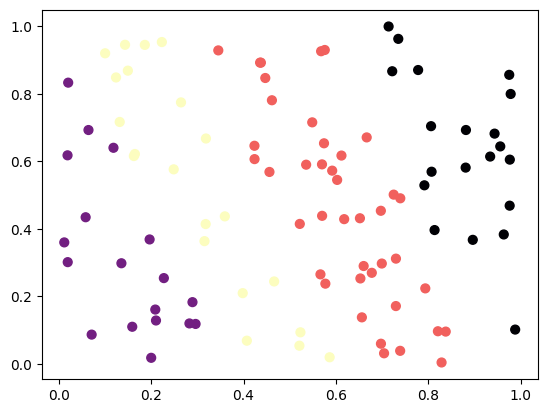

In [ ]:
gmm= mixture.GaussianMixture(n_components=4)
gmm_model= gmm.fit(X_streched)
labels= gmm.predict(X_streched)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='magma')

In [ ]:
probs=gmm.predict_proba(X_streched)
print(probs[:5].round(3))

[[0.003 0.    0.997 0.   ]
 [0.003 0.    0.997 0.   ]
 [0.    0.    0.901 0.099]
 [0.    0.    0.999 0.001]
 [0.997 0.    0.003 0.   ]]


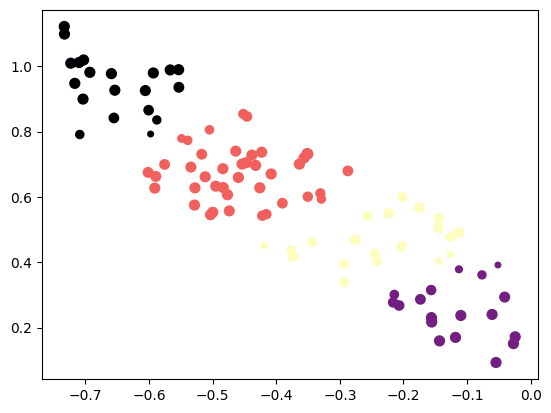

In [ ]:
size=50*probs.max(1)**2 # square emphasizes difference
plt.scatter(X_streched[:, 0], X_streched[:, 1], c=labels, s=size, cmap='magma')